In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import testing_test_size as testing
    import RelativePaths as RP
    import Evaluation as Eva

%run ../script/GatherData.py

Text(0.5, 1.0, 'Shows the number of files for every label, from JabRef')

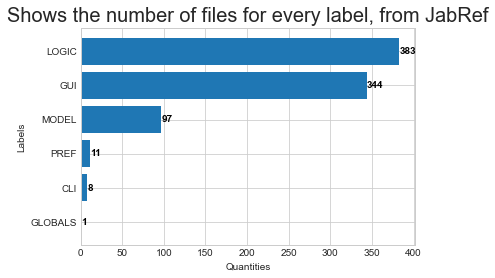

In [2]:
dataset_df = pd.read_csv(str(RP.getRawDataSet()))
y_labels = dataset_df.Label.unique()
x_quantity = [len(dataset_df.loc[dataset_df['Label']==label]) for label in y_labels]
tmp_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
tmp_df = tmp_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=tmp_df.Labels, width=tmp_df.Quantity)
for i, v in enumerate(tmp_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantities')
plt.ylabel('Labels')
plt.title('Shows the number of files for every label, from JabRef',fontsize = 20)

In [3]:
# Parse the data according to the rules above
settings = [["raw", "tow", "jk", "scw", "lc"]]
# file to save the result in
basic_file = '../Data/test_size_testing.csv'
basic_df = Prep.preprocess_settings(settings, basic_file)

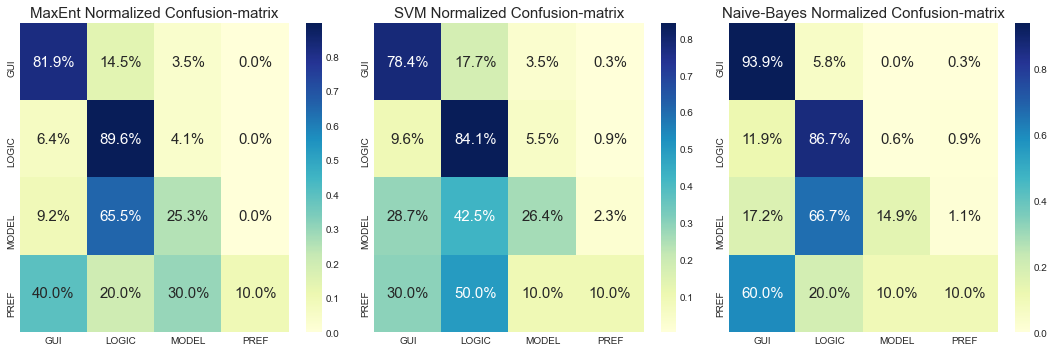

835


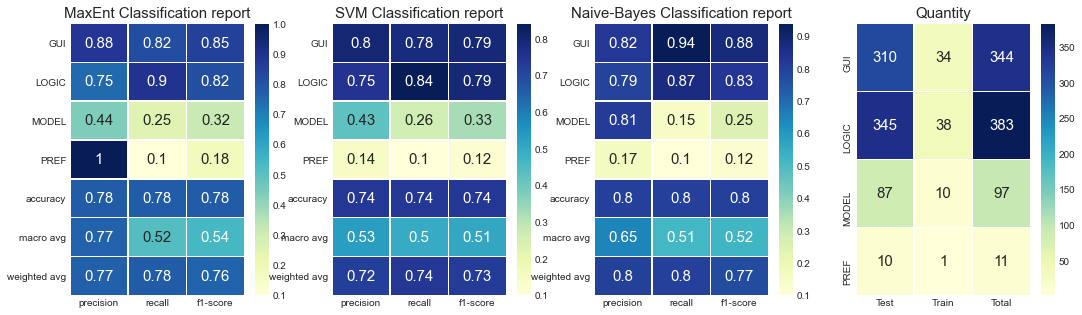

<Figure size 432x288 with 0 Axes>

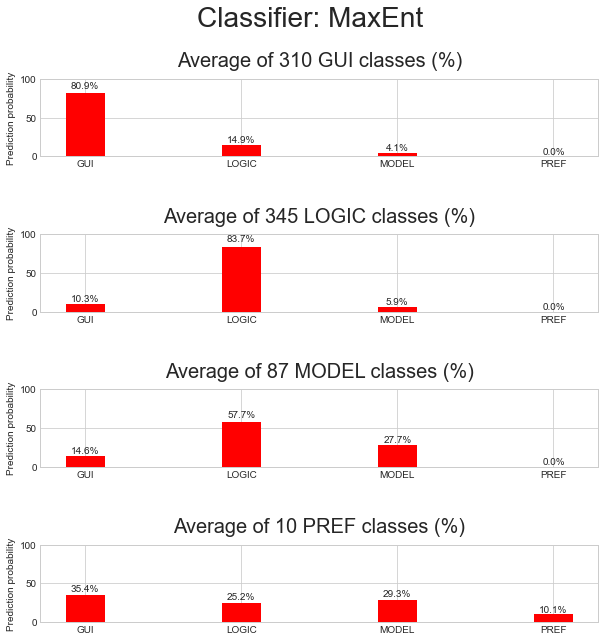

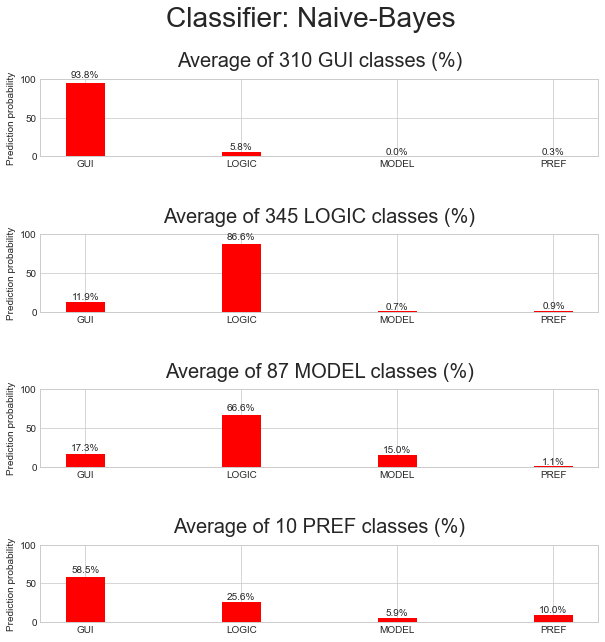

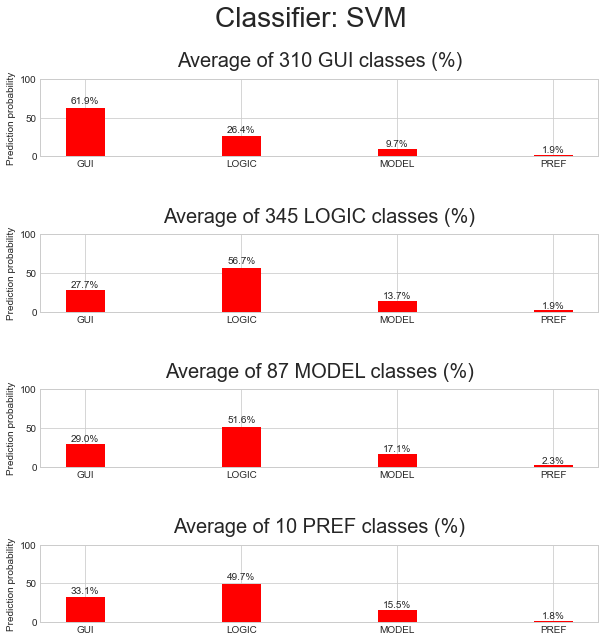

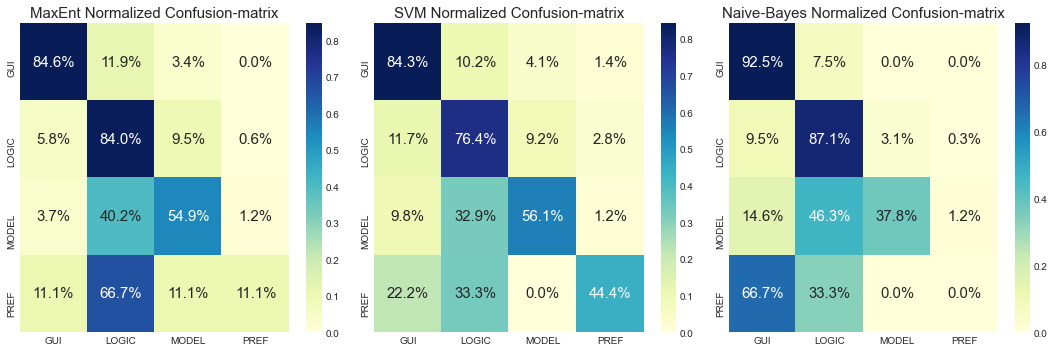

835


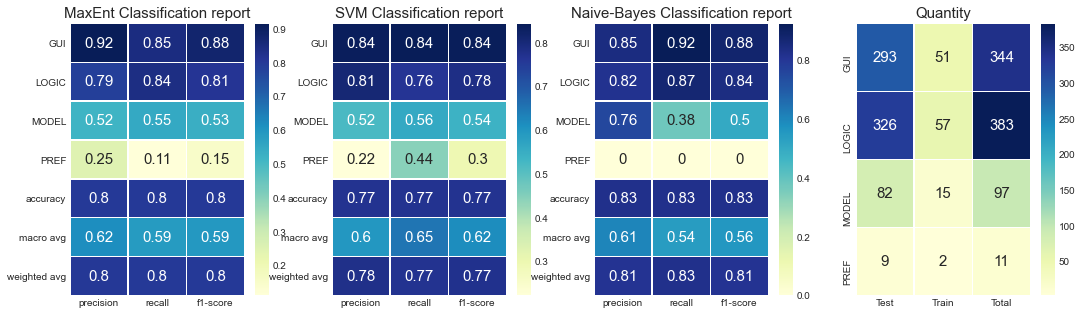

<Figure size 432x288 with 0 Axes>

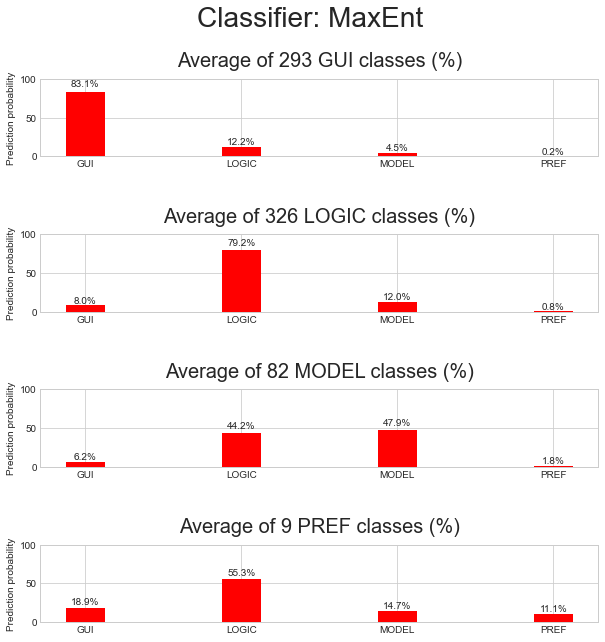

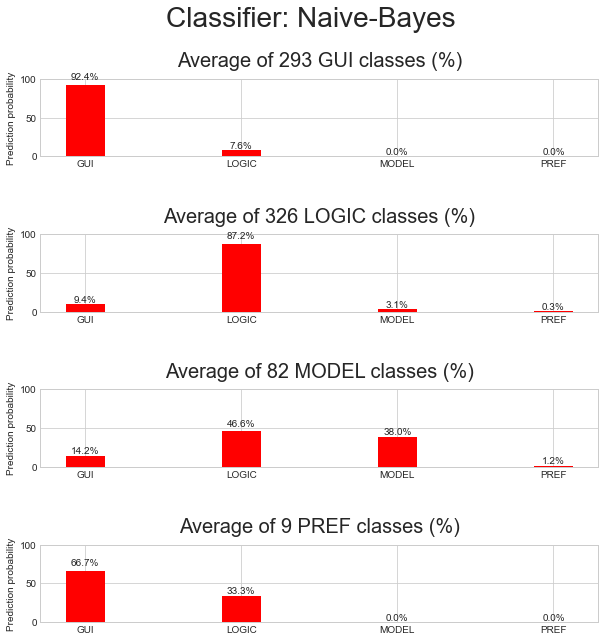

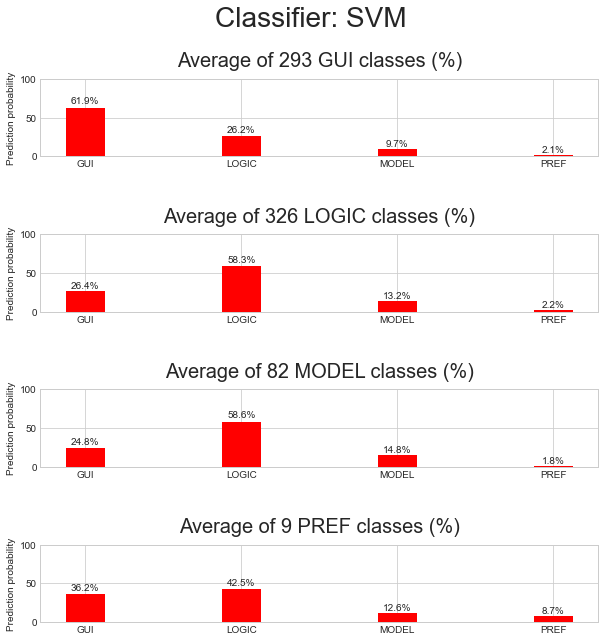

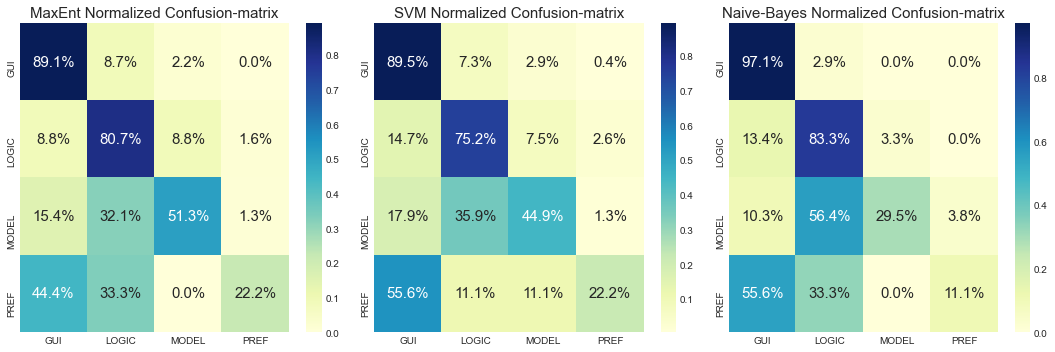

835


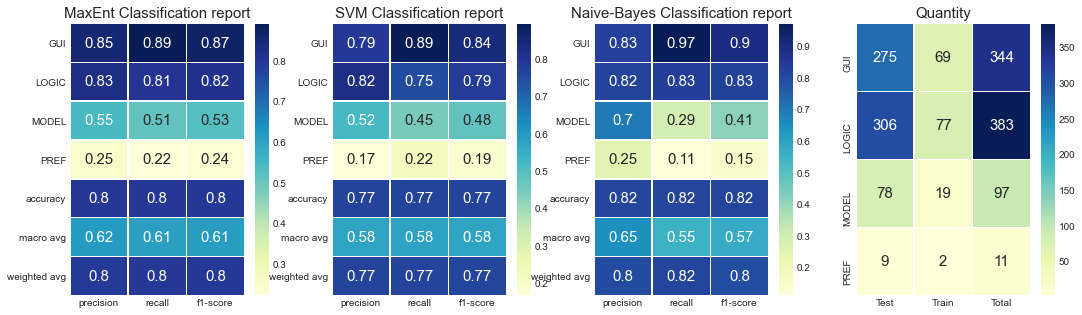

<Figure size 432x288 with 0 Axes>

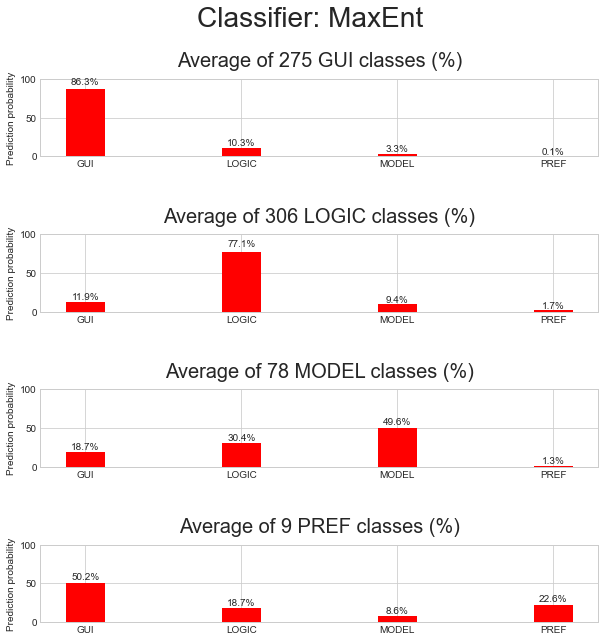

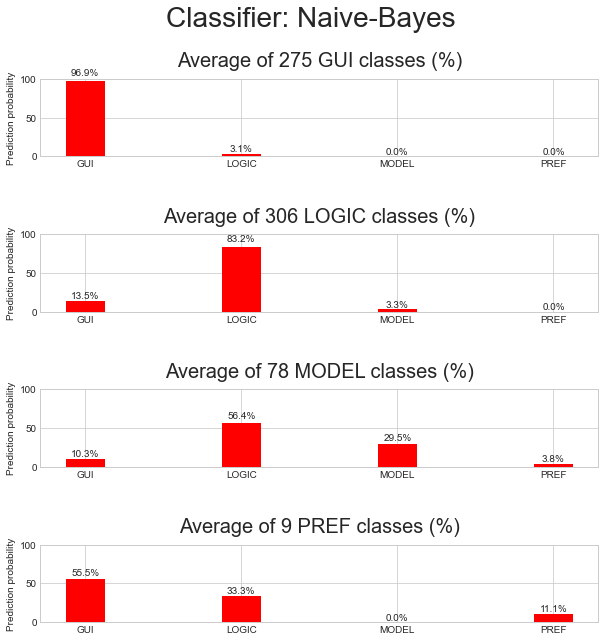

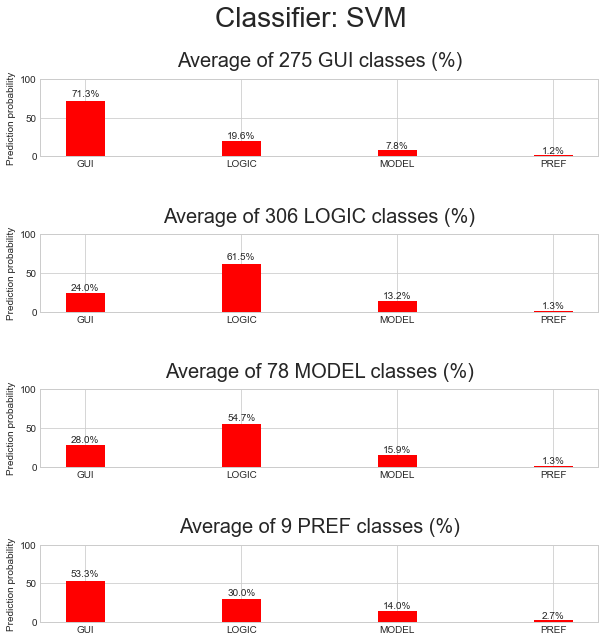

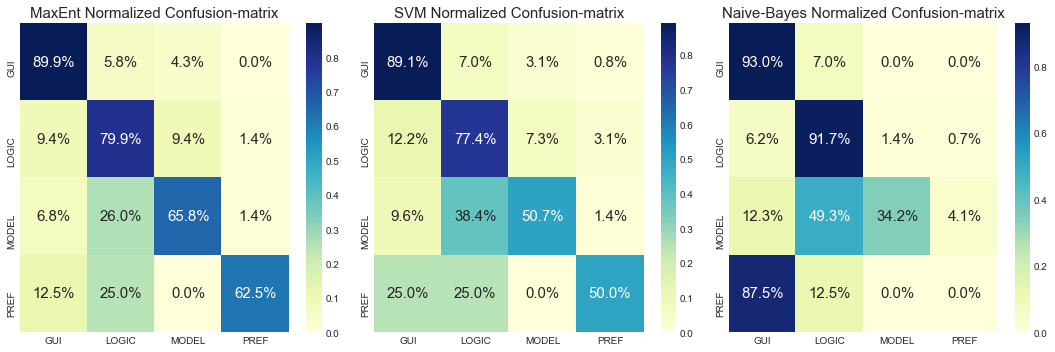

835


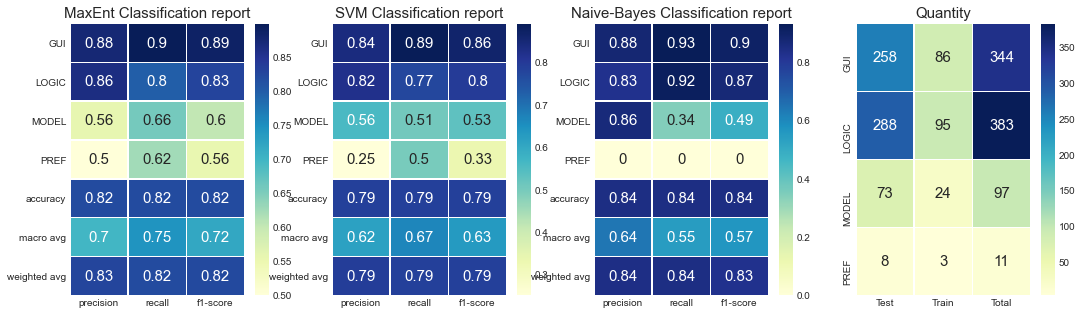

<Figure size 432x288 with 0 Axes>

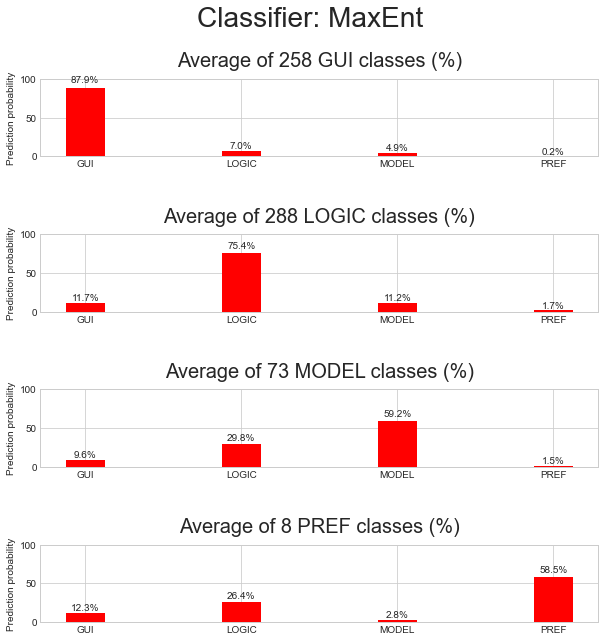

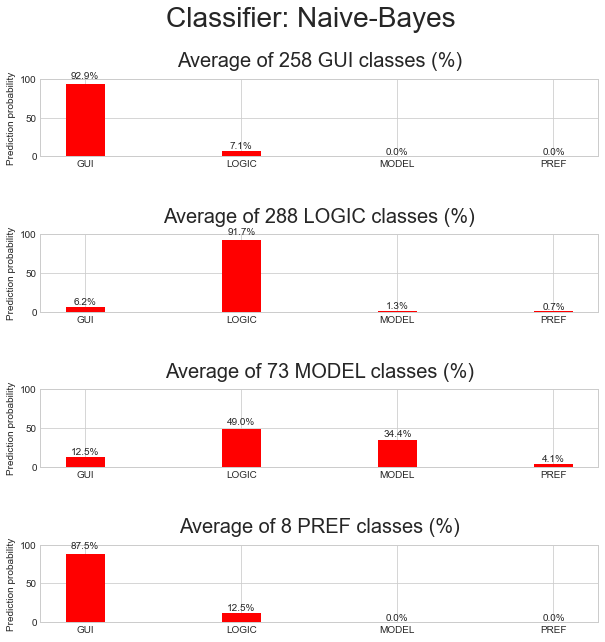

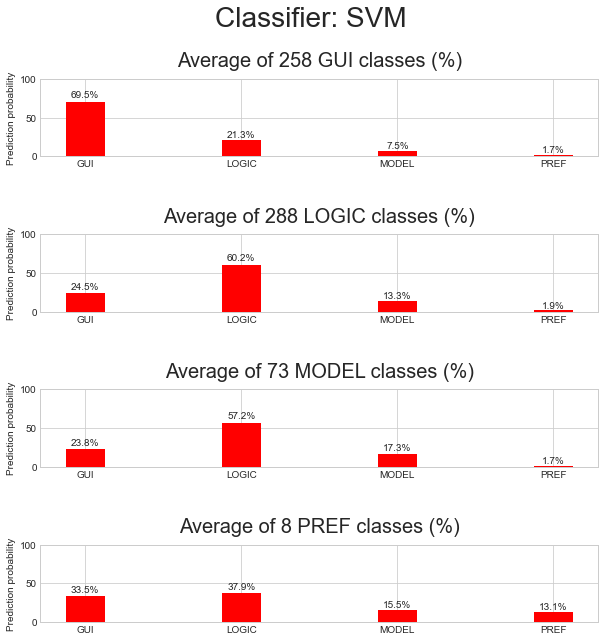

In [4]:
basic_df = pd.read_csv(basic_file)
# Remove GLOBALS and CLI from the dataset
df_sliced = Eva.filter_unwanted_labels(basic_df, 'Label', ['GLOBALS', 'CLI'])
test_sizes = [0.9,0.85,0.80,0.75]

# Train and gather evaluation metrics
for test_size in test_sizes:    
   testing.testing_test_size(df_sliced, test_size)
